In [2]:
from ModelClass import RegressionModel
from DatasetClass import Dataset
import matplotlib.pyplot as plt
import numpy as np
import itertools

2025-01-29 01:05:12.589852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738109112.613298 1035395 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738109112.620586 1035395 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 01:05:12.646084: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-29 01:05:17.029978: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

In [3]:
erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
patrik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*Ztt*.root"


6523673


2025-01-29 01:05:34.081137: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


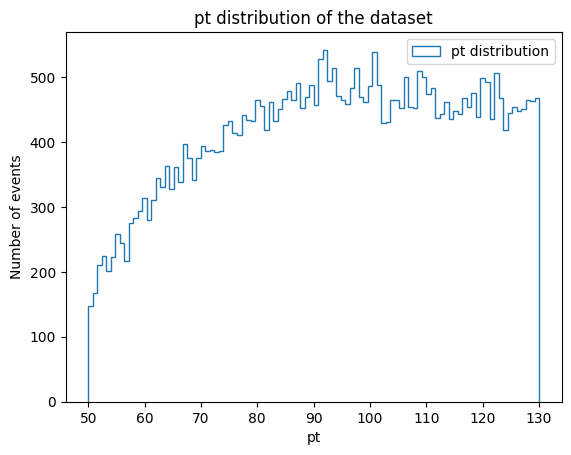

In [4]:
dataset = Dataset(file_paths=erik_data, file_name = "erik_data")
dataset.load_data()

print(len(dataset.train_dataset))

#This block of code iterates through the dataset and extracts the pt values of the labels and stores them in a list
data = [labels.numpy()[0] for features, labels in dataset.train_dataset.take(100000)]

plt.hist(data, bins=100, range=(50, 130), histtype='step', label='pt distribution', density=False)
plt.legend(loc='upper right')
plt.title('pt distribution of the dataset')
plt.xlabel('pt')
plt.ylabel('Number of events')
plt.show()



In [ ]:
dataset = Dataset(file_paths=erik_data, file_name = "erik_data")
dataset.load_data()

print(len(dataset.train_dataset))
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10, 20, 30]
}

iterable = list(itertools.product(*param_grid.values()))
for params in iterable:
    model = RegressionModel(dataset=dataset, batch_size=params[0], initial_learning_rate=params[1], n_epochs=params[2])
    model.prepare_dataset()
    model.create_normalizer()
    model.build_model()
    model.train_model(model.train_batch, model.val_batch)
    model.plot_history(model.history)

6523673
Batching datasets...
Building model...
Training model...
Epoch 1/10


2025-01-29 01:07:34.276361: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


203865/203865 ━━━━━━━━━━━━━━━━━━━━ 220s 1ms/step - loss: 6972.8779 - mean_squared_error: 6972.8779 - val_loss: 6874.8071 - val_mean_squared_error: 6874.8286
Epoch 2/10
203825/203865 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 6946.1182 - mean_squared_error: 6946.1182